### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
air=pd.read_excel("CO2 dataset.xlsx")
air

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


### Basic stastitics

In [3]:
# Describe
air.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [4]:
# info
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [5]:
# To find there is any null values
air.isnull().sum()

Year    0
CO2     0
dtype: int64

##### There is no null values 

In [6]:
# To find out it is normal distribution or not
air.skew()

Year    0.000000
CO2     0.362736
dtype: float64

##### The dataset is normal distribution

In [7]:
# Chaecking there is any outlier using kurtosis
air.kurtosis()

Year   -1.200000
CO2    -1.417272
dtype: float64

##### There is less Outliers

In [8]:
# Checking there is any duplicated values
air[air.duplicated()]

,Year,CO2


##### There is no duplicated values

### Visualization 

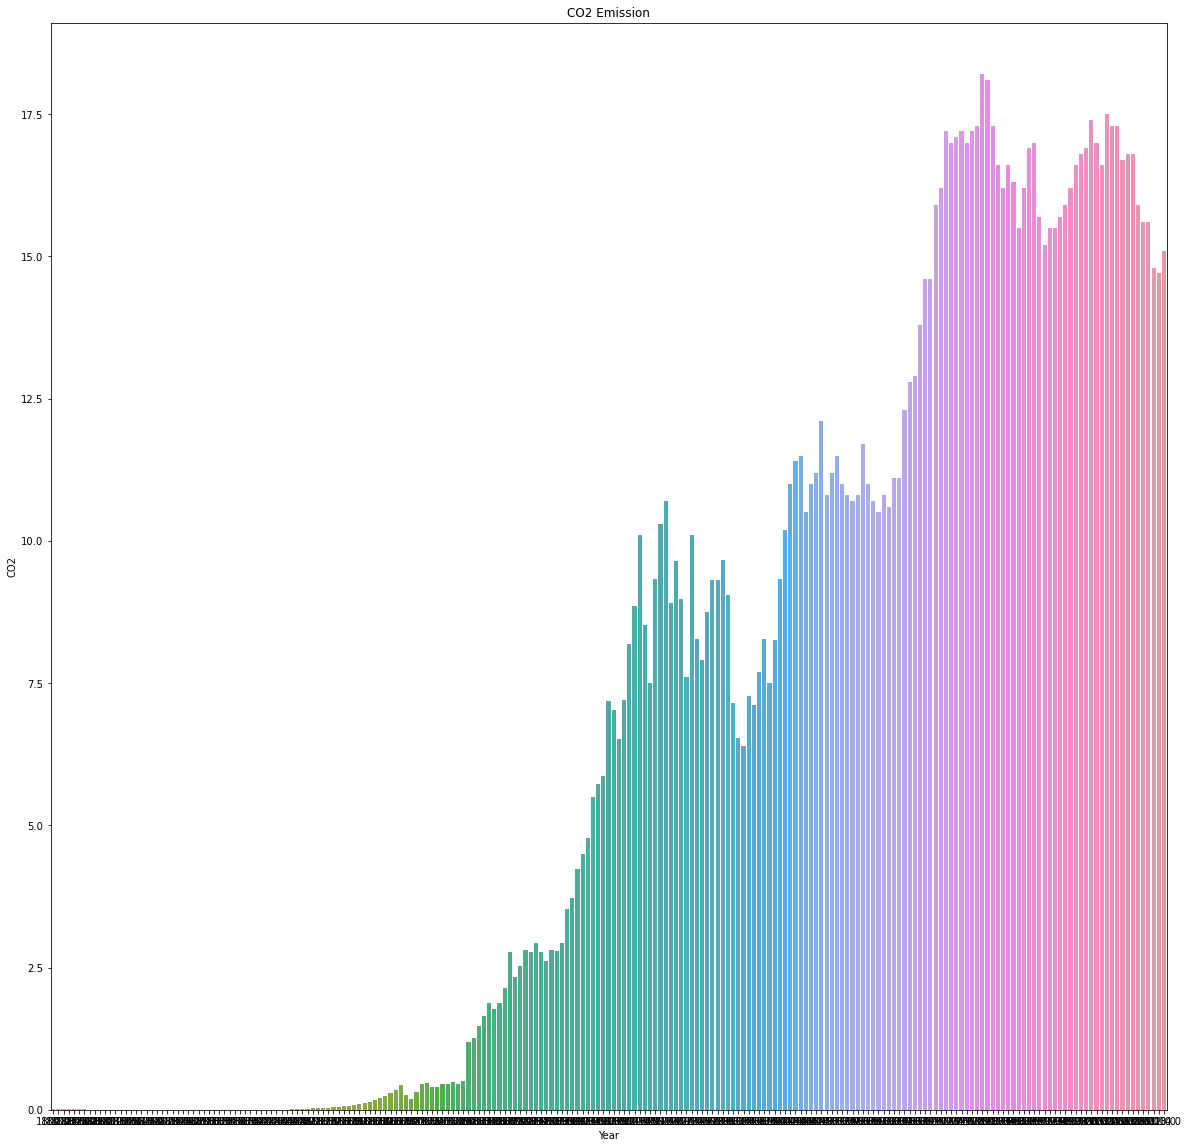

In [9]:
# checking increase of Co2 emission according with year
plt.figure(figsize=(20,20))
sns.barplot(x="Year",y="CO2",data=air)
plt.xlabel("Year")
plt.ylabel("CO2")
plt.title("CO2 Emission")
plt.show()           

<AxesSubplot:xlabel='Year', ylabel='Density'>

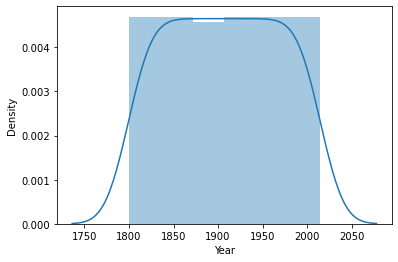

In [10]:
# Checking the data is normal distribution or not by using graphial representations
sns.distplot(air["Year"])

<AxesSubplot:xlabel='CO2', ylabel='Density'>

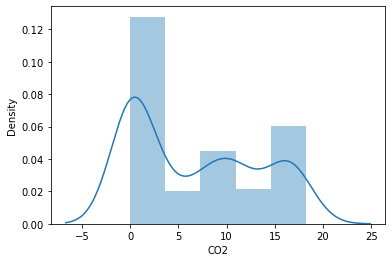

In [11]:
sns.distplot(air["CO2"])

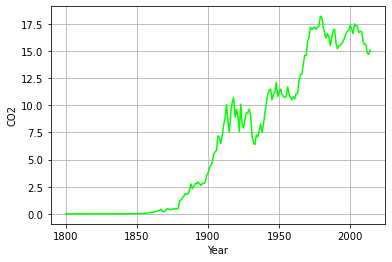

In [12]:
# line plot
sns.lineplot(x="Year",y="CO2",data=air,color="lime")
plt.xlabel("Year")
plt.ylabel("CO2")
plt.grid()
plt.show()

#### Outlier checking

<AxesSubplot:>

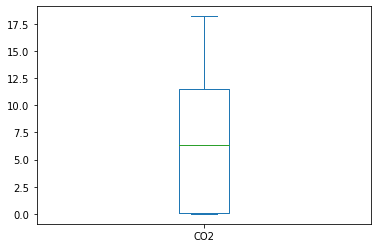

In [13]:
# Using boxplot 
air["CO2"].plot(kind="box")

### Lag plot 

In [14]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

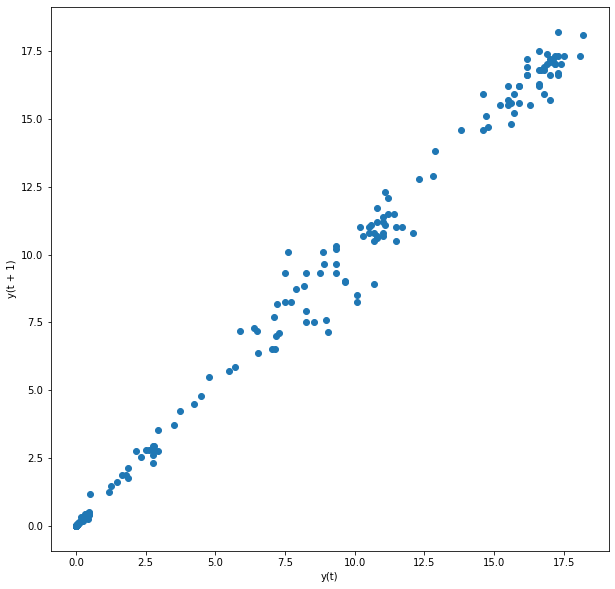

In [15]:
plt.figure(figsize=(10,10))
lag_plot(air["CO2"])

##### Converting float into datetime format

In [16]:
air_c=air.copy()

In [17]:
air_c["Year"]=pd.to_datetime(air_c["Year"])
air_c

,Year,CO2
0,1970-01-01 00:00:00.000001800,0.00568
1,1970-01-01 00:00:00.000001801,0.00561
2,1970-01-01 00:00:00.000001802,0.00555
3,1970-01-01 00:00:00.000001803,0.00548
4,1970-01-01 00:00:00.000001804,0.00542
...,...,...
210,1970-01-01 00:00:00.000002010,15.60000
211,1970-01-01 00:00:00.000002011,15.60000
212,1970-01-01 00:00:00.000002012,14.80000
213,1970-01-01 00:00:00.000002013,14.70000


### Seasonal Decompose

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

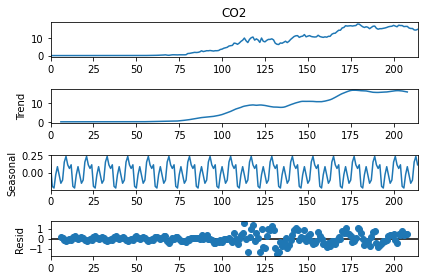

In [21]:
decompose_ts_add=seasonal_decompose(air_c["CO2"],period=12)
decompose_ts_add.plot()
plt.show()

#### ACF plots and PACF plots - To Identify the significant features that contribute to forcast

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots

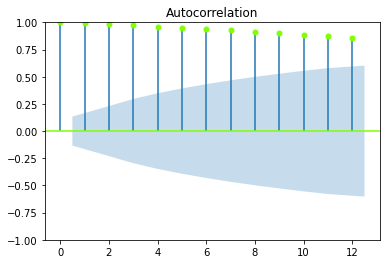

In [23]:
tsa_plots.plot_acf(air_c["CO2"],lags=12,color="chartreuse")
plt.show()

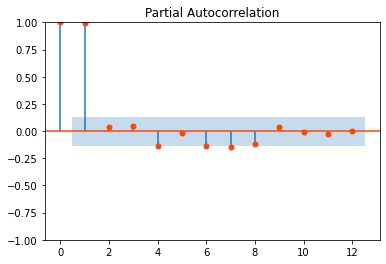

In [24]:
tsa_plots.plot_pacf(air_c["CO2"],lags=12,color="orangered")
plt.show()